# Data Exploration: Iron Hack

## Load data

In [88]:
import pandas as pd

df = pd.read_csv('../data/Fifa 23 Players Data.csv')
df

Known As         Full Name  Overall  Potential  Value(in Euro)  \
0          L. Messi      Lionel Messi       91         91        54000000   
1        K. Benzema     Karim Benzema       91         91        64000000   
...             ...               ...      ...        ...             ...   
18537  D. McCallion  Daithí McCallion       47         61          100000   
18538      N. Rabha       Nabin Rabha       47         50           60000   

      Positions Played Best Position          Nationality  \
0                   RW           CAM            Argentina   
1                CF,ST            CF               France   
...                ...           ...                  ...   
18537               CB            CB  Republic of Ireland   
18538               LB            LB                India   

                                             Image Link  Age  Height(in cm)  \
0      https://cdn.sofifa.net/players/158/023/23_60.png   35            169   
1      https://cdn.sofifa.net/players/165/153/23_60.png   34            185   
...                                                 ...  ...            ...   
18537  https://cdn.sofifa.net/players/267/824/23_60.png   17            178   
18538  https://cdn.sofifa.net/players/261/424/23_60.png   25            176   

       Weight(in kg)  TotalStats  BaseStats            Club Name  \
0                 67        2190        452  Paris Saint-Germain   
1                 81        2147        455       Real Madrid CF   
...              ...         ...        ...                  ...   
18537             65        1113        226           Derry City   
18538             66        1277        269  NorthEast United FC   

       Wage(in Euro)  Release Clause Club Position Contract Until  \
0             195000        99900000            RW           2023   
1             450000       131199999            CF           2023   
...              ...             ...           ...            ...   
18537            500          218000           SUB           2024   
18538            500           86000           RES           2023   

      Club Jersey Number  Joined On On Loan Preferred Foot  Weak Foot Rating  \
0                     30       2021       -           Left                 4   
1                      9       2009       -          Right                 4   
...                  ...        ...     ...            ...               ...   
18537                 37       2022       -          Right                 3   
18538                 25       2020       -           Left                 3   

       Skill Moves  International Reputation National Team Name  \
0                4                         5          Argentina   
1                4                         4             France   
...            ...                       ...                ...   
18537            2                         1                  -   
18538            2                         1                  -   

                  National Team Image Link National Team Position  \
0      https://cdn.sofifa.net/flags/ar.png                     RW   
1      https://cdn.sofifa.net/flags/fr.png                     ST   
...                                    ...                    ...   
18537                                    -                      -   
18538                                    -                      -   

      National Team Jersey Number Attacking Work Rate Defensive Work Rate  \
0                              10                 Low                 Low   
1                              19              Medium              Medium   
...                           ...                 ...                 ...   
18537                           -              Medium              Medium   
18538                           -              Medium              Medium   

       Pace Total  Shooting Total  Passing Total  Dribbling Total  \
0              81              89             90   

## [X] Best 10 players by market value

### Data preprocessing

In [89]:
df['Value(in Euro)']

0        54000000
1        64000000
           ...   
18537      100000
18538       60000
Name: Value(in Euro), Length: 18539, dtype: int64

In [90]:
df = df.set_index('Known As')
df

Full Name  Overall  Potential  Value(in Euro)  \
Known As                                                             
L. Messi          Lionel Messi       91         91        54000000   
K. Benzema       Karim Benzema       91         91        64000000   
...                        ...      ...        ...             ...   
D. McCallion  Daithí McCallion       47         61          100000   
N. Rabha           Nabin Rabha       47         50           60000   

             Positions Played Best Position          Nationality  \
Known As                                                           
L. Messi                   RW           CAM            Argentina   
K. Benzema              CF,ST            CF               France   
...                       ...           ...                  ...   
D. McCallion               CB            CB  Republic of Ireland   
N. Rabha                   LB            LB                India   

                                                    Image Link  Age  \
Known As                                                              
L. Messi      https://cdn.sofifa.net/players/158/023/23_60.png   35   
K. Benzema    https://cdn.sofifa.net/players/165/153/23_60.png   34   
...                                                        ...  ...   
D. McCallion  https://cdn.sofifa.net/players/267/824/23_60.png   17   
N. Rabha      https://cdn.sofifa.net/players/261/424/23_60.png   25   

              Height(in cm)  Weight(in kg)  TotalStats  BaseStats  \
Known As                                                            
L. Messi                169             67        2190        452   
K. Benzema              185             81        2147        455   
...                     ...            ...         ...        ...   
D. McCallion            178             65        1113        226   
N. Rabha                176             66        1277        269   

                        Club Name  Wage(in Euro)  Release Clause  \
Known As                                                           
L. Messi      Paris Saint-Germain         195000        99900000   
K. Benzema         Real Madrid CF         450000       131199999   
...                           ...            ...             ...   
D. McCallion           Derry City            500          218000   
N. Rabha      NorthEast United FC            500           86000   

             Club Position Contract Until Club Jersey Number  Joined On  \
Known As                                                                  
L. Messi                RW           2023                 30       2021   
K. Benzema              CF           2023                  9       2009   
...                    ...            ...                ...        ...   
D. McCallion           SUB           2024                 37       2022   
N. Rabha               RES           2023                 25       2020   

             On Loan Preferred Foot  Weak Foot Rating  Skill Moves  \
Known As                                                             
L. Messi           -           Left                 4            4   
K. Benzema         -          Right                 4            4   
...              ...            ...               ...          ...   
D. McCallion       -          Right                 3            2   
N. Rabha           -           Left                 3            2   

              International Reputation National Team Name  \
Known As                                                    
L. Messi                             5          Argentina   
K. Benzema                           4             France   
...                                ...                ...   
D. McCallion                         1                  -   
N. Rabha                             1                  -   

                         National Team Image Link National Team Position  \
Known As                                                                 

In [91]:
s = df['Value(in Euro)']
s

Known As
L. Messi        54000000
K. Benzema      64000000
                  ...   
D. McCallion      100000
N. Rabha           60000
Name: Value(in Euro), Length: 18539, dtype: int64

In [92]:
s = s.sort_values(ascending=False).head(10)
s

Known As
K. Mbappé       190500000
E. Haaland      148000000
F. de Jong      116500000
Pedri           116000000
M. Salah        115500000
P. Foden        109500000
Vinícius Jr.    109000000
Rúben Dias      107500000
K. De Bruyne    107500000
J. Kimmich      105500000
Name: Value(in Euro), dtype: int64

### Data visualization

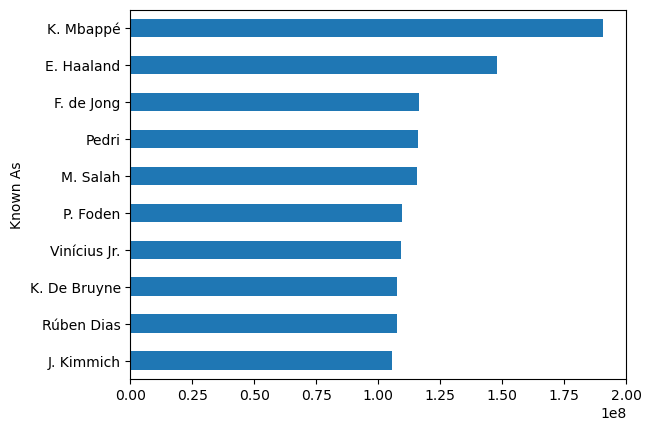

In [94]:
s.sort_values().plot.barh();

## [ ] Rank 10 best players by overall rating

### Data preprocessing

In [98]:
s = df['Overall'].sort_values().tail(10)

### Data visualization

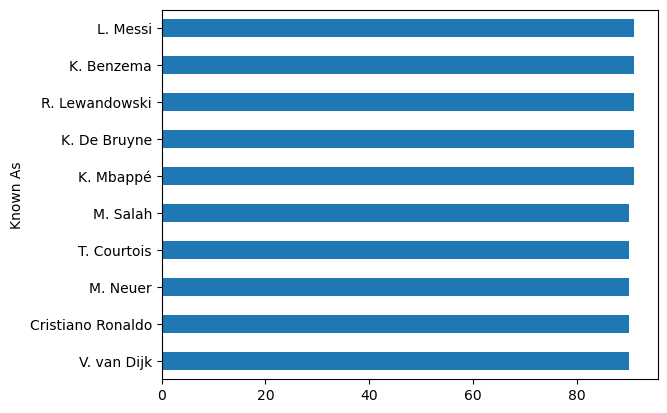

In [99]:
s.plot.barh();

## [X] Rank 10 teams with most players under 20

### Data preprocessing

In [102]:
mask = df['Age'] < 20
dff = df[mask]
dff

Full Name  Overall  Potential  Value(in Euro)  \
Known As                                                                  
Pedri          Pedro González López       85         93       116000000   
J. Bellingham       Jude Bellingham       84         91        81500000   
...                             ...      ...        ...             ...   
L. Mullan               Liam Mullan       47         67          130000   
D. McCallion       Daithí McCallion       47         61          100000   

              Positions Played Best Position          Nationality  \
Known As                                                            
Pedri                       CM            CM                Spain   
J. Bellingham            CM,LM            CM              England   
...                        ...           ...                  ...   
L. Mullan                   CM            RM     Northern Ireland   
D. McCallion                CB            CB  Republic of Ireland   

                                                     Image Link  Age  \
Known As                                                               
Pedri          https://cdn.sofifa.net/players/251/854/23_60.png   19   
J. Bellingham  https://cdn.sofifa.net/players/252/371/23_60.png   19   
...                                                         ...  ...   
L. Mullan      https://cdn.sofifa.net/players/267/823/23_60.png   18   
D. McCallion   https://cdn.sofifa.net/players/267/824/23_60.png   17   

               Height(in cm)  Weight(in kg)  TotalStats  BaseStats  \
Known As                                                             
Pedri                    174             61        2109        455   
J. Bellingham            186             75        2182        469   
...                      ...            ...         ...        ...   
L. Mullan                170             65        1333        277   
D. McCallion             178             65        1113        226   

                       Club Name  Wage(in Euro)  Release Clause Club Position  \
Known As                                                                        
Pedri               FC Barcelona         115000       261000000            CM   
J. Bellingham  Borussia Dortmund          41000       154900000           CDM   
...                          ...            ...             ...           ...   
L. Mullan             Derry City            500          332000           SUB   
D. McCallion          Derry City            500          218000           SUB   

              Contract Until Club Jersey Number  Joined On On Loan  \
Known As                                                             
Pedri                   2026                  8       2020       -   
J. Bellingham           2025                 22       2020       -   
...                      ...                ...        ...     ...   
L. Mullan               2023                 38       2022       -   
D. McCallion            2024                 37       2022       -   

              Preferred Foot  Weak Foot Rating  Skill Moves  \
Known As                                                      
Pedri                  Right                 4            4   
J. Bellingham          Right                 4            4   
...                      ...               ...          ...   
L. Mullan              Right                 3            2   
D. McCallion           Right                 3            2   

               International Reputation National Team Name  \
Known As                                                     
Pedri                                 2              Spain   
J. Bellingham                         2            England   
...                                 ...                ...   
L. Mullan                             1                  -   
D. McCallion                          1                  -   

                              National Team Image Link National Team Position  \
Kno

In [103]:
len(dff)

1945

In [104]:
s = dff.groupby('Club Name').size()
s = s.sort_values(ascending=False).head(10)
s

Club Name
FC Nordsjælland             15
Olympique Lyonnais          12
SC Freiburg II              11
Borussia Dortmund           10
Olympique de Marseille      10
Southampton                  9
UCD AFC                      9
FC Girondins de Bordeaux     9
Deportivo La Guaira FC       9
FC Red Bull Salzburg         9
dtype: int64

### Data visualization

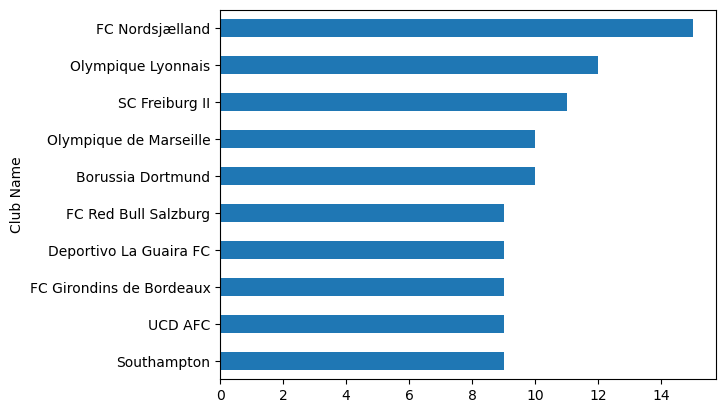

In [105]:
s.sort_values().plot.barh();

## Rank 10 teams with most players above 85 overall

### Data preprocessing

In [123]:
mask = df['Overall'] > 85
dff = df[mask]
dff

Full Name  Overall  Potential  \
Known As                                                                    
L. Messi                                 Lionel Messi       91         91   
K. Benzema                              Karim Benzema       91         91   
...                                               ...      ...        ...   
Vinícius Jr.         Vinícius José de Oliveira Júnior       86         92   
S. Milinković-Savić           Sergej Milinković-Savić       86         87   

                     Value(in Euro) Positions Played Best Position  \
Known As                                                             
L. Messi                   54000000               RW           CAM   
K. Benzema                 64000000            CF,ST            CF   
...                             ...              ...           ...   
Vinícius Jr.              109000000               LW            LW   
S. Milinković-Savić        77500000               CM            CM   

                    Nationality  \
Known As                          
L. Messi              Argentina   
K. Benzema               France   
...                         ...   
Vinícius Jr.             Brazil   
S. Milinković-Savić      Serbia   

                                                           Image Link  Age  \
Known As                                                                     
L. Messi             https://cdn.sofifa.net/players/158/023/23_60.png   35   
K. Benzema           https://cdn.sofifa.net/players/165/153/23_60.png   34   
...                                                               ...  ...   
Vinícius Jr.         https://cdn.sofifa.net/players/238/794/23_60.png   21   
S. Milinković-Savić  https://cdn.sofifa.net/players/223/848/23_60.png   27   

                     Height(in cm)  Weight(in kg)  TotalStats  BaseStats  \
Known As                                                                   
L. Messi                       169             67        2190        452   
K. Benzema                     185             81        2147        455   
...                            ...            ...         ...        ...   
Vinícius Jr.                   176             73        1985        434   
S. Milinković-Savić            191             76        2250        477   

                               Club Name  Wage(in Euro)  Release Clause  \
Known As                                                                  
L. Messi             Paris Saint-Germain         195000        99900000   
K. Benzema                Real Madrid CF         450000       131199999   
...                                  ...            ...             ...   
Vinícius Jr.              Real Madrid CF         200000       245300000   
S. Milinković-Savić                Lazio          90000       137600000   

                    Club Position Contract Until Club Jersey Number  \
Known As                                                              
L. Messi                       RW           2023                 30   
K. Benzema                     CF           2023                  9   
...                           ...            ...                ...   
Vinícius Jr.                   LW           2025                 20   
S. Milinković-Savić            CM           2024                 21   

                     Joined On On Loan Preferred Foot  Weak Foot Rating  \
Known As                                                                  
L. Messi                  2021       -           Left                 4   
K. Benzema                2009       -          Right                 4   
...                        ...     ...            ...               ...   
Vinícius Jr.              2018       -          Right                 4   
S. Milinković-Savić       2015       -          Right                 5   

                     Skill Moves  International Reputation National Team Name  \
Known As                                                

In [124]:
len(dff)

65

In [125]:
s = dff.groupby('Club Name').size()
s = s.sort_values(ascending=False).head(10)
s

Club Name
Manchester City        9
Liverpool              7
Real Madrid CF         7
Paris Saint-Germain    7
FC Bayern München      6
Chelsea                5
Inter                  5
Manchester United      4
Tottenham Hotspur      3
FC Barcelona           3
dtype: int64

### Data visualization

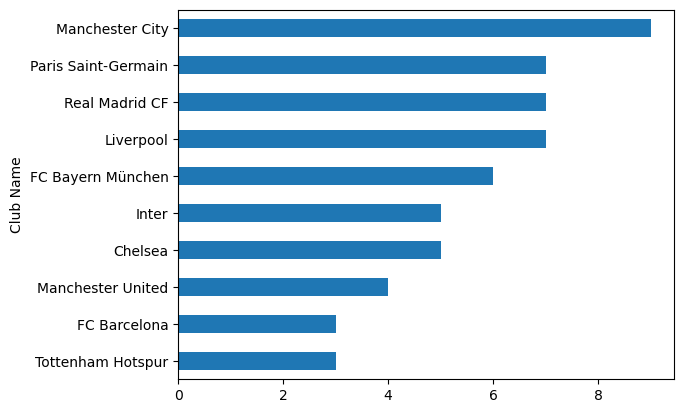

In [126]:
s.sort_values().plot.barh();

## [X] The youngest team in the dataset (on average)

### Data preprocessing

In [127]:
s = df.groupby('Club Name')['Age'].mean()
s = s.sort_values().head(10)
s

Club Name
FC Nordsjælland                20.607143
SC Freiburg II                 20.925926
UCD AFC                        20.954545
Villarreal Club de Fútbol B    21.266667
Borussia Dortmund II           21.720000
FC Girondins de Bordeaux       21.851852
Vitesse                        22.185185
New York Red Bulls             22.321429
Shelbourne FC                  22.333333
AZ Alkmaar                     22.333333
Name: Age, dtype: float64

### Data visualization

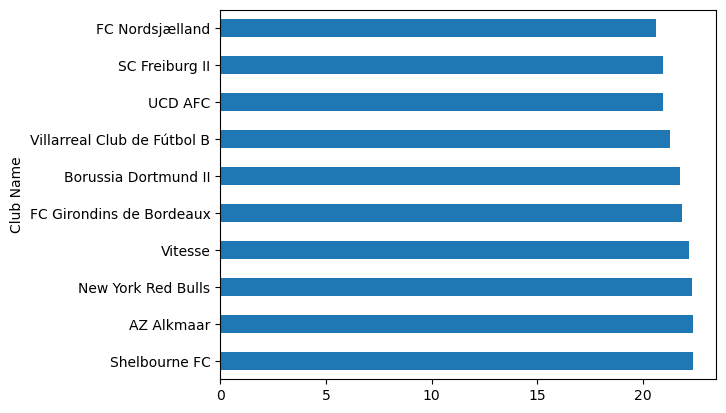

In [128]:
s.sort_values(ascending=False).plot.barh();

## [X] Rank football teams by highest market value

### Data preprocessing

In [133]:
s = df.groupby('Club Name')['Value(in Euro)'].sum()
s = s.sort_values().tail(10)
s

Club Name
Inter                   750550000
Atlético de Madrid      757600000
Manchester United       775950000
Chelsea                 928525000
FC Bayern München       962375000
FC Barcelona           1013125000
Real Madrid CF         1035625000
Paris Saint-Germain    1051375000
Liverpool              1098825000
Manchester City        1248655000
Name: Value(in Euro), dtype: int64

### Data visualization

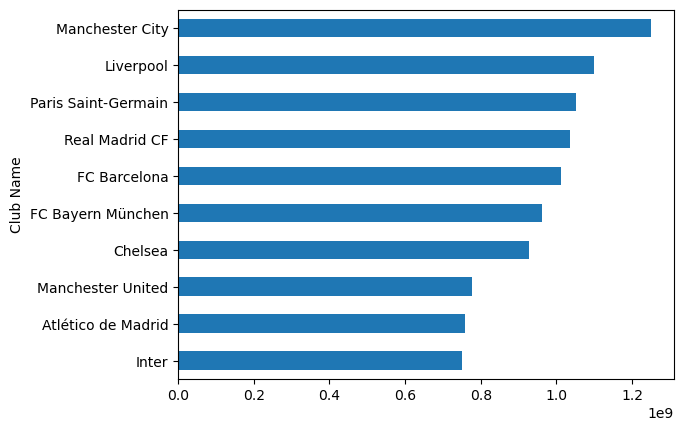

In [135]:
s.plot.barh();

## [ ] Rank national teams by the highest player potential (average)

### Data preprocessing

In [136]:
s = df.groupby('National Team Name')['Potential'].mean()
s = s.sort_values().tail(10)
s

National Team Name
Croatia        80.833333
Belgium        81.739130
Argentina      83.826087
Netherlands    83.869565
Italy          84.260870
Portugal       85.217391
Spain          85.391304
England        85.652174
Germany        85.869565
France         86.260870
Name: Potential, dtype: float64

### Data visualization

<Axes: ylabel='National Team Name'>

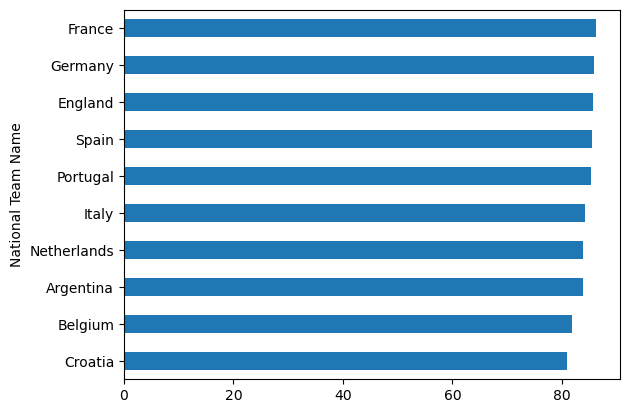

In [137]:
s.plot.barh()

## Extra: Rank national teams by the highest average player potential

### Data preprocessing

In [139]:
s = df.groupby('National Team Name')[['Overall', 'Potential']].mean()
s = s.sort_values('Overall').tail(10)
s

Overall  Potential
National Team Name                      
Brazil              80.086957  80.086957
Netherlands         81.130435  83.869565
Belgium             81.173913  81.739130
Argentina           82.086957  83.826087
Italy               82.260870  84.260870
Portugal            83.000000  85.217391
England             83.043478  85.652174
Spain               83.086957  85.391304
Germany             83.782609  85.869565
France              84.043478  86.260870

### Data visualization

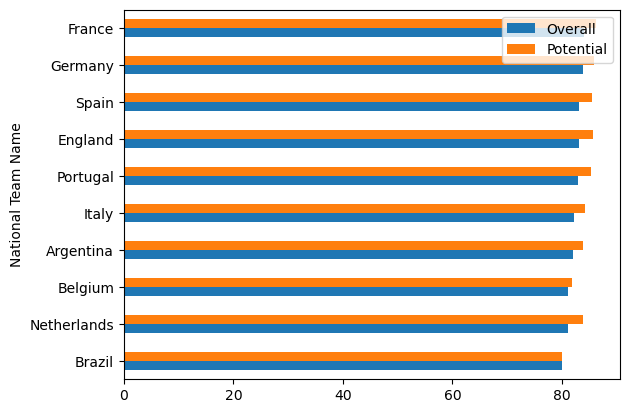

In [141]:
s.plot.barh();